# Benchmarking `nvjpeg` 📊

In [ ]:
%run benchmark_nvjpeg_LoLa.py

# 📈 Data Visualization & Analysis

Now we will plot the collected data to understand the results. We will focus on:
1.  **Rate-Distortion:** How do quality metrics (like VMAF) change with file size?
2.  **Quality vs. File Size:** How does the `-quality` setting impact file size for different subsampling methods?
3.  **Encoding Performance:** Which Format method is fastest? How does resolution affect encoding time?
4.  **Decoding Performance:** How does resolution affect decoding time?

In [57]:
 # --- Main Configuration ---
# Resolutions to test (Name: (Width, Height))
RESOLUTIONS = {
    '1280x720': (1280, 720),
    '1920x1080': (1920, 1080),
    '3840x2160': (3840, 2160),
}

RESOLUTION_TO_FILENAME = {
    '1280x720': 'frame_hd.rgb',
    '1920x1080': 'frame_fullhd.rgb',
}

# Parameters to benchmark
QUALITIES = range(40, 96, 1)
SUBSAMPLINGS = ['4:2:0']

SUBSAMPLING_TO_PARAM = {
    '4:2:0': '420'
}

In [58]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('results_nvjpeg_LoLa.csv')
df.head()

,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD,Frame
0,1280x720,40,4:2:0,100,0.000409,0.324201,0.041239,0.001015,0.131120,0.102119,22.272,39.839592,0.946028,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
1,1280x720,41,4:2:0,100,0.000412,0.139084,0.041574,0.001026,0.136960,0.103166,22.573,39.726013,0.945477,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
2,1280x720,42,4:2:0,100,0.000411,0.144560,0.041480,0.001027,0.140453,0.103245,22.740,39.400272,0.947826,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
3,1280x720,43,4:2:0,100,0.000418,0.138810,0.042168,0.001026,0.133297,0.103192,22.811,39.409573,0.947849,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
4,1280x720,44,4:2:0,100,0.000412,0.138658,0.041525,0.001035,0.132941,0.104110,23.137,39.501678,0.945159,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1


In [60]:
# Set plot style
sns.set_theme(style="whitegrid")

## Encoding Parameters vs. quality metrics

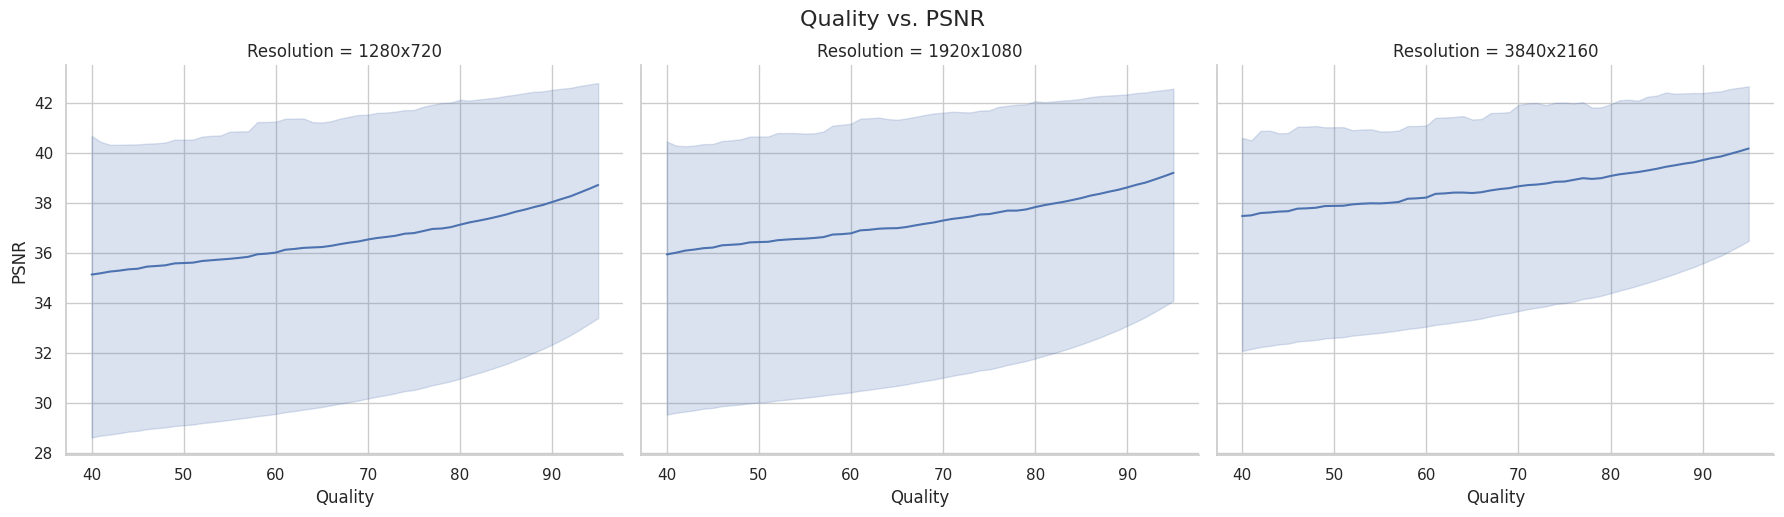

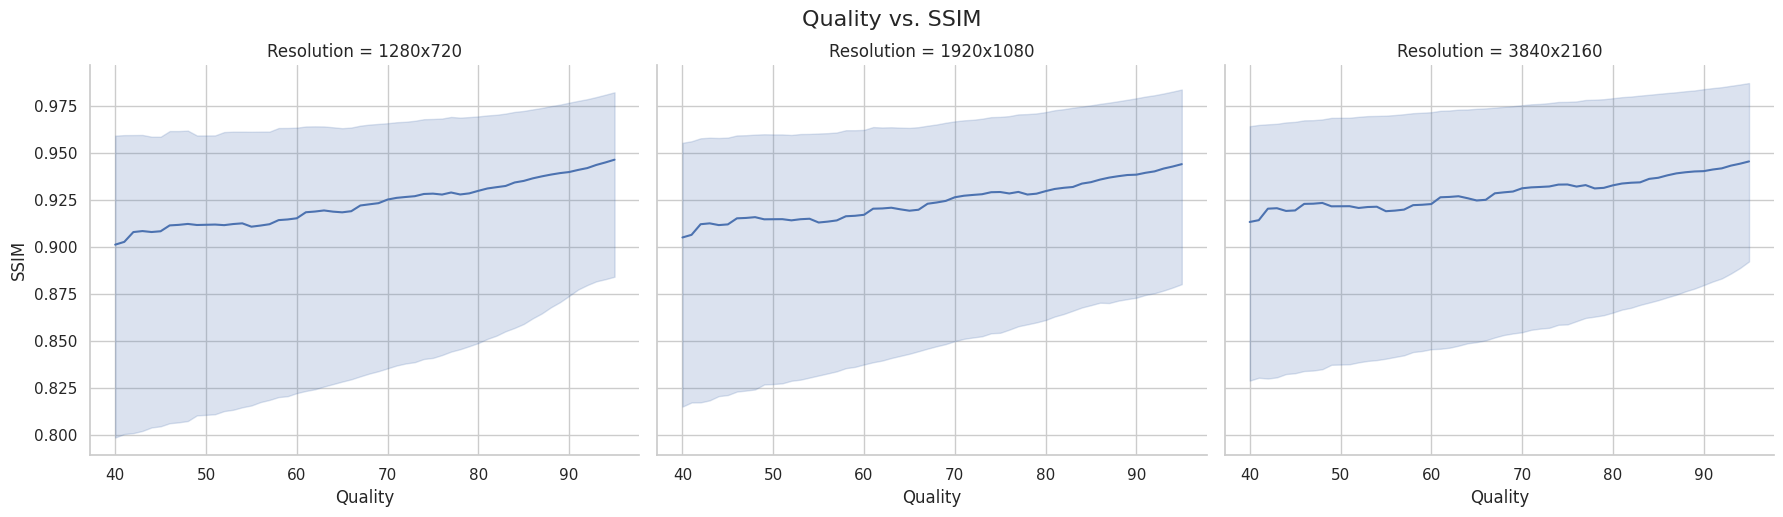

In [61]:
x = 'Quality'
y = 'PSNR'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False},
    errorbar=("pi", 100)
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

x = 'Quality'
y = 'SSIM'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False},
    errorbar=("pi", 100)
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

## Encoding Parameters vs. File Size


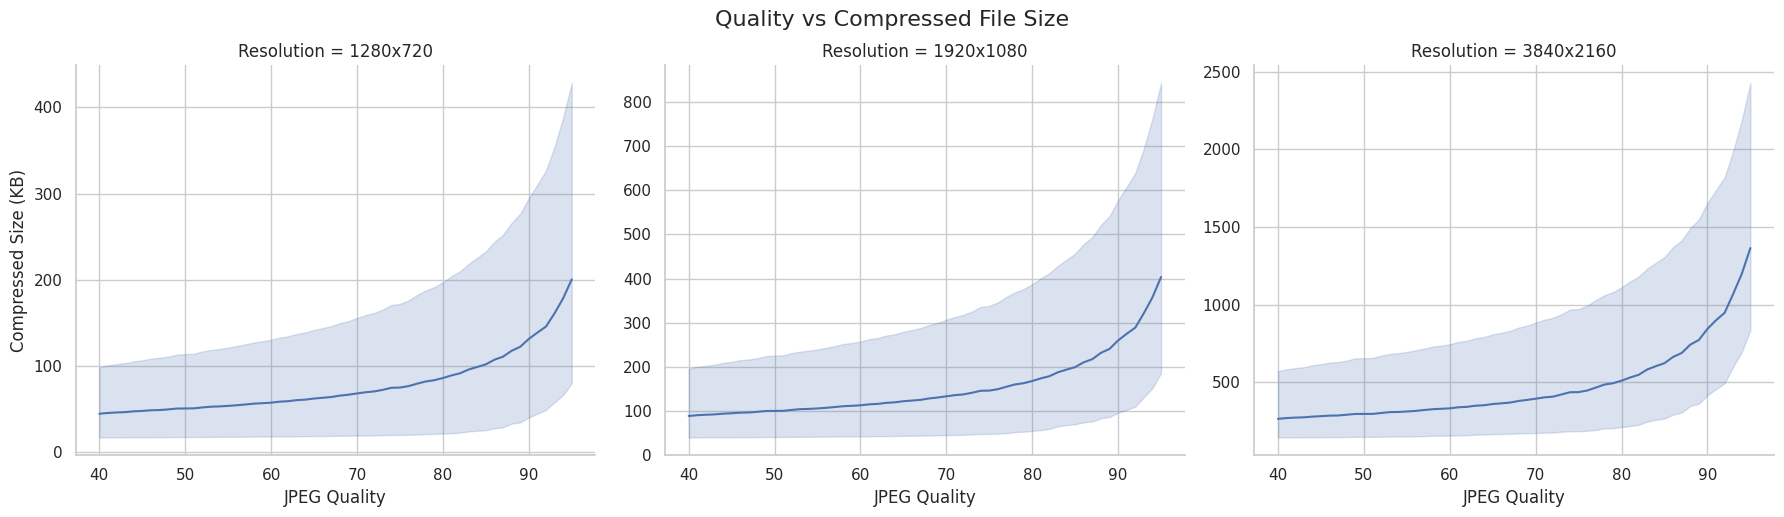

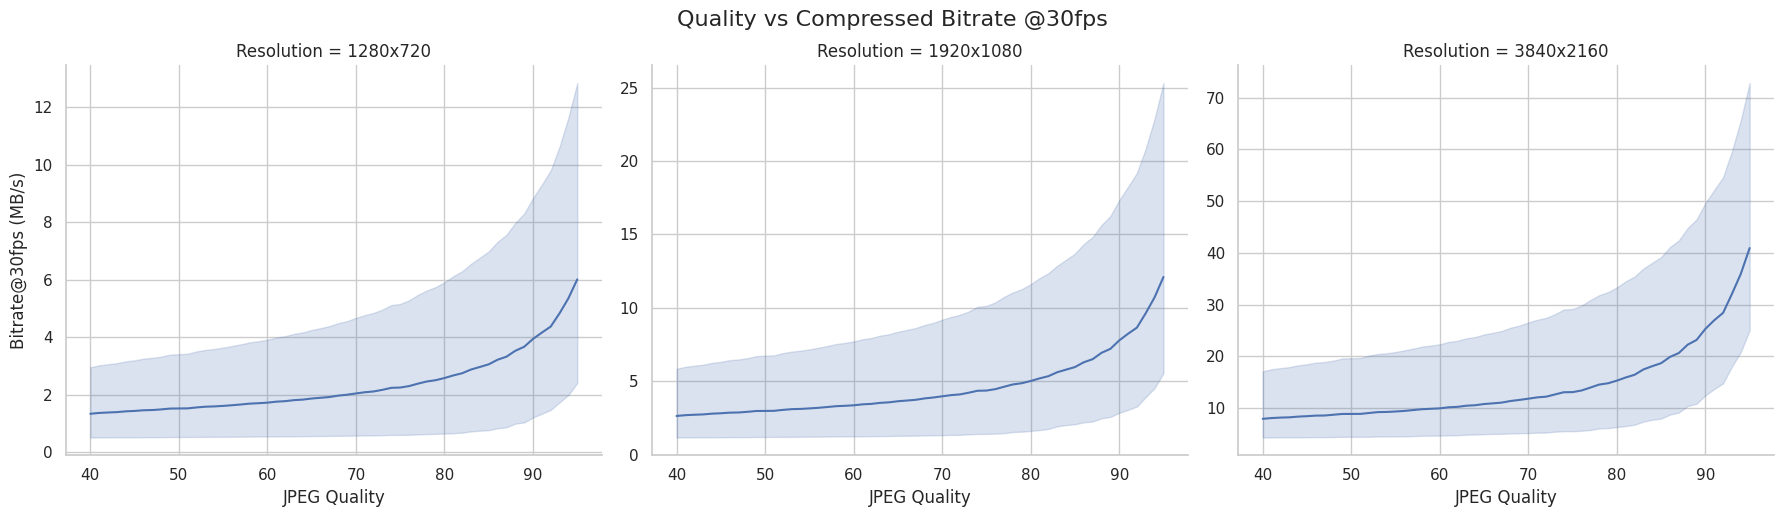

In [62]:
g = sns.relplot(
    data=df,
    x='Quality',
    y='Compressed Size (KB)',
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False},
    errorbar=("pi", 100)
)
g.figure.suptitle('Quality vs Compressed File Size', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Compressed Size (KB)')
plt.show()

fps = 30
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Compressed Size (KB)'] * fps / 1000,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False},
    errorbar=("pi", 100)
)
g.figure.suptitle(f'Quality vs Compressed Bitrate @{fps}fps', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', f'Bitrate@{fps}fps (MB/s)')
plt.show()

We can observe an explosion in file size from quality 95 onwards, and a sharp increase from quality 90 onwards.

## Encoding Parameters vs. Performance

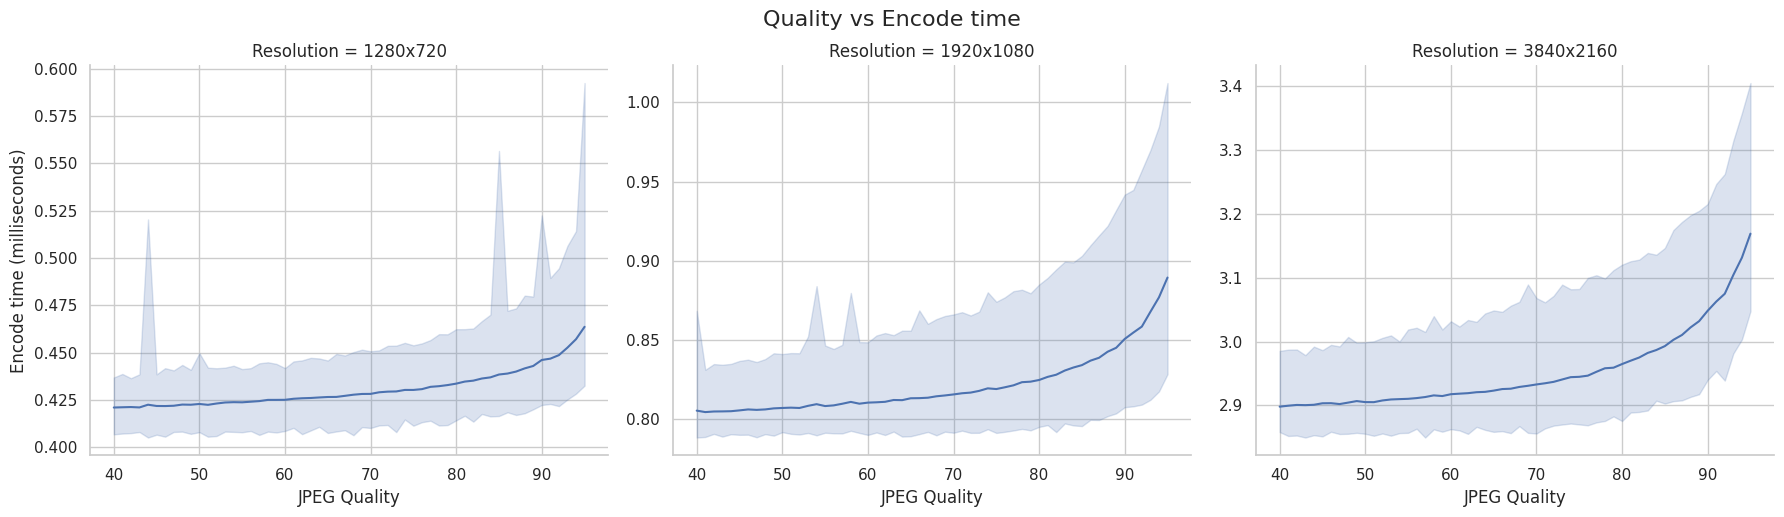

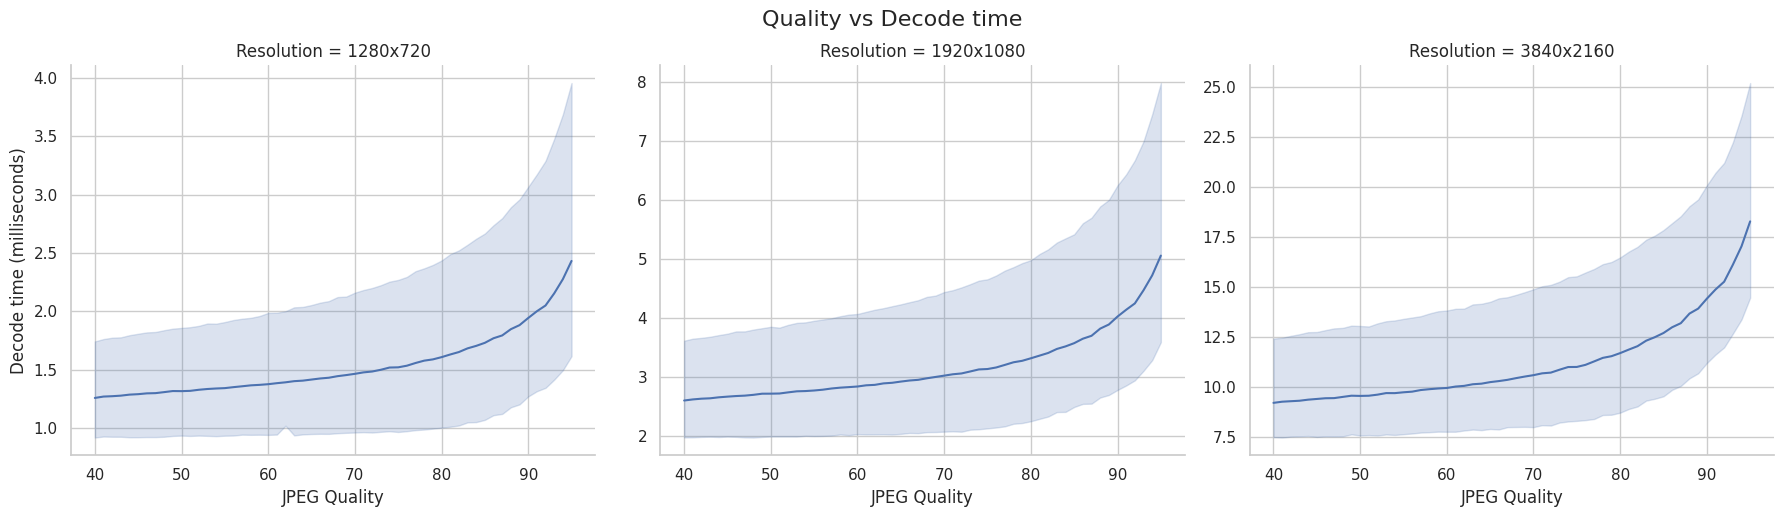

In [63]:
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Encode Time (s)'] * 1000,
    #hue='Frame',
    kind='line',
    col='Resolution',
    col_order=RESOLUTIONS.keys(),
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False},
    errorbar=("pi", 100)
)
g.figure.suptitle('Quality vs Encode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Encode time (milliseconds)')
plt.show()

g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Decode Time (s)'] * 1000,
    #hue='Frame',
    kind='line',
    col='Resolution',
    col_order=RESOLUTIONS.keys(),
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False},
    errorbar=("pi", 100)
)
g.figure.suptitle('Quality vs Decode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Decode time (milliseconds)')
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 2 * 2]
plt.show()

### Perform average avross frames

In [64]:
df_agg = df.groupby(['Quality', 'Resolution']).agg({
    #'Quality': 'first',  # kept as-is (assuming same value across group)
    'Avg Encode Time (s)': 'mean',  # averaged
    'Avg Decode Time (s)': 'mean',
    'Compressed Size (KB)': 'mean',
    'PSNR': 'mean',
    'SSIM': 'mean',
}).reset_index()

In [65]:
df_ultrahd = df_agg[df_agg['Resolution'] == '3840x2160']
df_fullhd = df_agg[df_agg['Resolution'] == '1920x1080']
df_hd = df_agg[df_agg['Resolution'] == '1280x720']

### UltraHD

In [66]:
df_ultrahd[df_ultrahd['Avg Encode Time (s)'] * 1000 + df_ultrahd['Avg Decode Time (s)'] * 1000 <= 2 * 2].sort_values(by='SSIM', ascending=False).head(5)
#df = df[df['Avg Encode Time (s)'] * 1000 <= 2]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 2]
#df.sort_values(by='SSIM', ascending=False).head(5)

,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM


### FullHD

In [67]:
df_fullhd[df_fullhd['Avg Encode Time (s)'] * 1000 + df_fullhd['Avg Decode Time (s)'] * 1000 <= 2 * 2].sort_values(by='SSIM', ascending=False).head(5)


,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
107,93,1920x1080,0.000812,0.003101,131.173000,41.644299,0.963939
105,92,1920x1080,0.000814,0.003058,125.938400,40.674829,0.952888
103,91,1920x1080,0.000814,0.003055,127.648333,40.751662,0.951516
101,90,1920x1080,0.000814,0.003020,125.463077,40.664216,0.948768
99,89,1920x1080,0.000812,0.002966,118.958778,40.591877,0.944668


In [68]:
df_fullhd[df_fullhd['Avg Encode Time (s)'] * 1000 + df_fullhd['Avg Decode Time (s)'] * 1000 <= 1.5 * 2].sort_values(by='SSIM', ascending=False).head(5)

,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM


In [69]:
df_fullhd[df_fullhd['Avg Encode Time (s)'] * 1000 + df_fullhd['Avg Decode Time (s)'] * 1000 <= 1 * 2].sort_values(by='SSIM', ascending=False).head(5)


,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM


In [70]:
df_fullhd[df_fullhd['Avg Encode Time (s)'] * 1000 + df_fullhd['Avg Decode Time (s)'] * 1000 <= 0.80 * 2].sort_values(by='SSIM', ascending=False).head(5)

,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM


### HD

In [71]:
df_hd[df_hd['Avg Encode Time (s)'] * 1000 + df_hd['Avg Decode Time (s)'] * 1000 <= 1.5 * 2].sort_values(by='SSIM', ascending=False).head(5)

,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
109,95,1280x720,0.000461,0.002364,190.557800,38.957505,0.947088
108,94,1280x720,0.000456,0.002261,176.615545,38.632017,0.945201
106,93,1280x720,0.000453,0.002153,161.287160,38.428857,0.943769
104,92,1280x720,0.000449,0.002049,145.897310,38.283370,0.942087
102,91,1280x720,0.000447,0.002000,138.894840,38.171409,0.941108


In [72]:
df_hd[df_hd['Avg Encode Time (s)'] * 1000 + df_hd['Avg Decode Time (s)'] * 1000 <= 1 * 2].sort_values(by='SSIM', ascending=False).head(5)


,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
74,77,1280x720,0.000432,0.001556,79.67700,36.976859,0.929076
70,75,1280x720,0.000430,0.001519,75.16658,36.811086,0.928474
68,74,1280x720,0.000430,0.001517,74.85623,36.786922,0.928288
72,76,1280x720,0.000431,0.001533,76.84426,36.892676,0.927983
66,73,1280x720,0.000429,0.001498,72.51583,36.705165,0.927111


In [73]:
df_hd[df_hd['Avg Encode Time (s)'] * 1000 + df_hd['Avg Decode Time (s)'] * 1000 <= 0.5 * 2].sort_values(by='SSIM', ascending=False).head(5)


,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM


In [74]:
df_hd[df_hd['Avg Encode Time (s)'] * 1000 + df_hd['Avg Decode Time (s)'] * 1000 <= 0.4 * 2].sort_values(by='SSIM', ascending=False).head(5)


,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
